# Reading in the data set
First thing first, lets start off by reading in the dataset.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('bitcoin.csv')
df.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2.991000e+03,2.991000e+03
mean,1496.000000,6893.326038,6486.009539,6700.146240,6711.290443,1.090633e+10,1.208761e+11
std,863.571653,11642.832456,10869.032130,11288.043736,11298.141921,1.888895e+10,2.109438e+11
min,1.000000,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08
25%,748.500000,436.179001,422.879486,430.445496,430.569489,3.036725e+07,6.305579e+09
50%,1496.000000,2387.610107,2178.500000,2269.889893,2286.409912,9.460360e+08,3.741503e+10
75%,2243.500000,8733.926948,8289.800460,8569.656493,8576.238715,1.592015e+10,1.499960e+11
max,2991.000000,64863.098910,62208.964370,63523.754870,63503.457930,3.509680e+11,1.186360e+12


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB


In [12]:
df.keys()

Index(['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close',
       'Volume', 'Marketcap'],
      dtype='object')

# Clustering Analysis

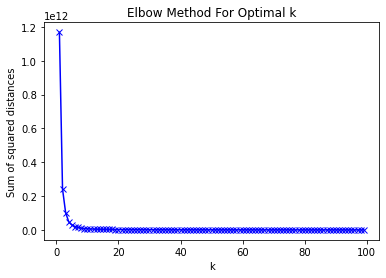

Distortion: 1353655603.962653
Average of square root:  672.7378861373509
Centroids: 
 [[  284.94136892   290.93575625   285.22880281]
 [32645.70893318 34034.66471818 32649.87746   ]
 [10381.49352898 10639.24215098 10399.83866402]
 [56006.1463975  57771.765074   56953.8463945 ]
 [ 6463.12566573  6586.17665445  6467.60263487]
 [18701.28346774 19197.83747194 18803.2562771 ]
 [50255.40300615 52154.19428692 50965.68638769]
 [ 2516.95670989  2619.24126351  2532.16733678]
 [37143.97979962 38527.39779615 37109.91877538]
 [11491.78459568 11765.83278179 11503.616376  ]
 [ 8252.75696455  8442.11516111  8265.64399047]
 [23126.00235556 23947.73231444 23502.04933222]
 [ 3889.25590399  3981.48987128  3898.83981129]
 [14877.87515727 15509.35382727 14906.69583591]
 [58576.22109167 59308.96908833 55461.43087667]
 [ 1176.2384414   1208.34111356  1182.7248411 ]
 [27096.38469857 28221.42667    27767.62880857]
 [ 9302.37811092  9474.38649066  9293.04412501]
 [58630.93353429 59963.02903952 58883.85760619]
 [

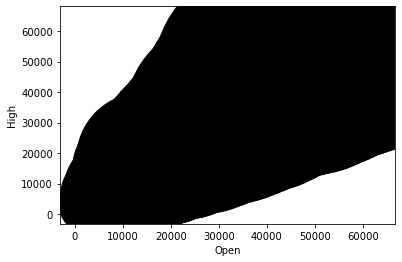

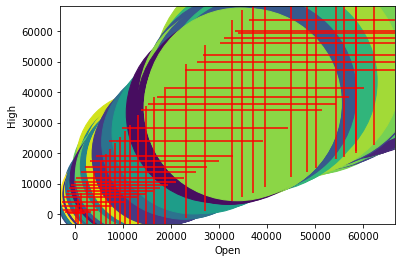

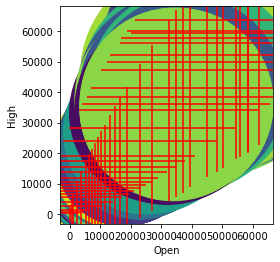

In [14]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import math

X = df[["Open", "High", "Close"]]

kmeans = KMeans(n_clusters=30)
kmeans.fit(X)

sosqud = []
K = range(1,100)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    sosqud.append(km.inertia_)
    
plt.plot(K, sosqud, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

print("Distortion:", kmeans.inertia_)
threeRMSavrg = math.sqrt(kmeans.inertia_ / len(X))
print("Average of square root: ", threeRMSavrg)
print("Centroids: \n", kmeans.cluster_centers_)
print("Assignments: ", kmeans.labels_)

plt.scatter(df['Open'], df['High'], df['Close'], color="black")
plt.xlabel("Open")
plt.ylabel("High")
plt.show()
cluster_x = [x for [x,y,z] in kmeans.cluster_centers_]
cluster_y = [y for [x,y,z] in kmeans.cluster_centers_]
cluster_z = [z for [x,y,z] in kmeans.cluster_centers_]
plt.scatter(df['Open'], df['High'], df['Close'], c=kmeans.labels_)
plt.scatter(cluster_x, cluster_y, cluster_z, marker="+", color="red")
plt.xlabel("Open")
plt.ylabel("High")
plt.show()

cluster_x = [x for [x,y,z] in kmeans.cluster_centers_]
cluster_y = [y for [x,y,z] in kmeans.cluster_centers_]
cluster_z = [z for [x,y,z] in kmeans.cluster_centers_]
plt.scatter(df['Open'], df['High'], df['Close'], c=kmeans.labels_)
plt.scatter(cluster_x, cluster_y, cluster_z, marker="+", color="red")
plt.xlabel("Open")
plt.ylabel("High")
plt.axis("scaled")
plt.show()

The clusters are pretty close to each other and there seems to be some sort of positive correlation.

# Dimensional Analysis
Performing dimensional analysis.

Argmax value: 1


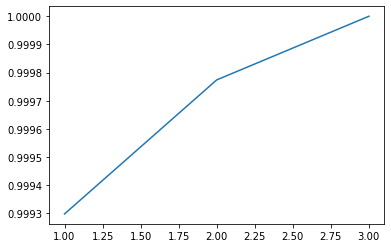

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

X = df[["Open", "Low", "Close"]]
X = StandardScaler().fit_transform(X)
y = df['High']
pca = PCA()
X_2D   = pca.fit_transform(X)

cumulative_sums = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumulative_sums >= 0.95) + 1

print('Argmax value:',d)
import matplotlib.pyplot as plt
valt = [i+1 for i in range(0,len(cumulative_sums))]
plt.plot(valt, cumulative_sums)
plt.show()

# Visualizing the data

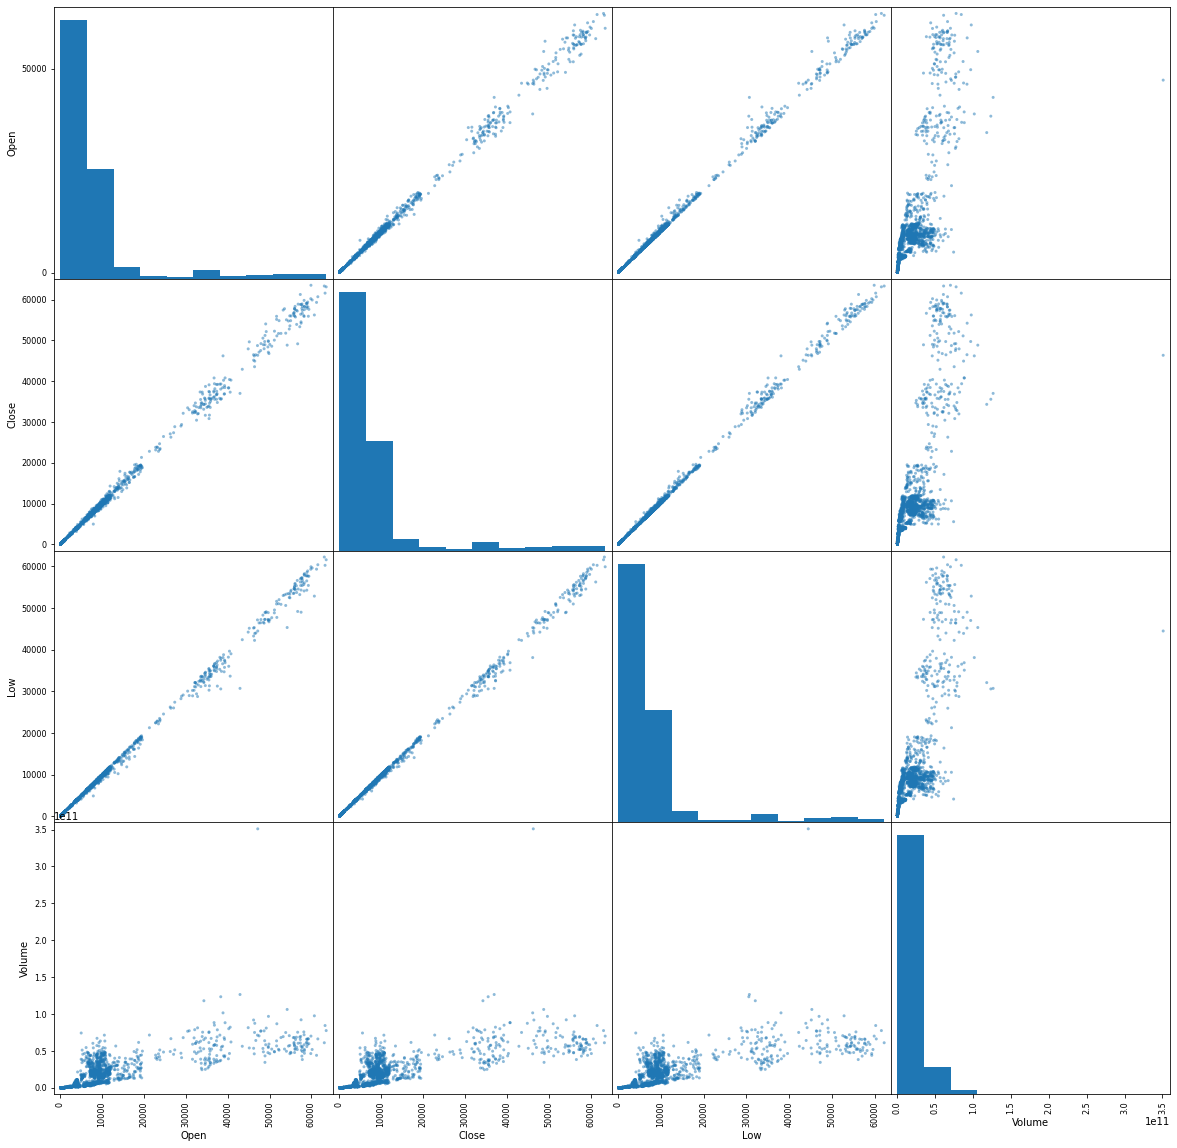

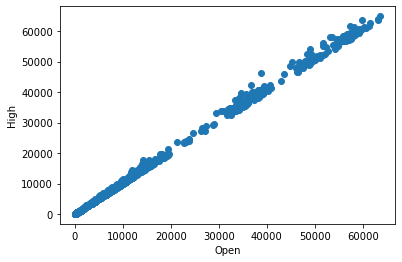

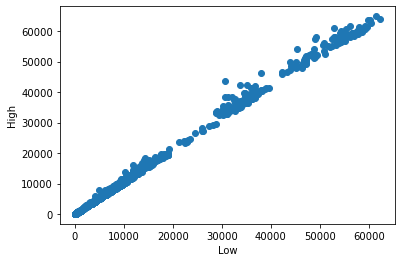

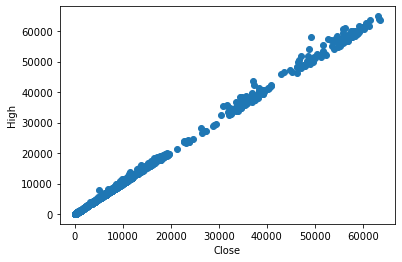

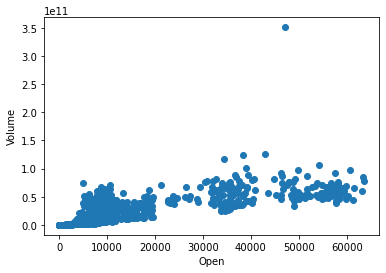

In [30]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

scatter_matrix(df[["Open", "Close", "Low", "Volume"]])
plt.gcf().set_size_inches((20, 20)) 
plt.show()

plt.scatter(df['Open'],df['High'])
plt.xlabel("Open")
plt.ylabel("High")
plt.show()

plt.scatter(df['Low'],df['High'])
plt.xlabel("Low")
plt.ylabel("High")
plt.show()

plt.scatter(df['Close'],df['High'])
plt.xlabel("Close")
plt.ylabel("High")
plt.show()

plt.scatter(df['Open'],df['Volume'])
plt.xlabel("Open")
plt.ylabel("Volume")
plt.show()


There is a strong relationship between the opening price and the high price of the currency. Therefore, it could be inferred that a greater opening price could mean a greater high price of the currency. This information could be beneficial to a day trader. The volume seems to be pretty stagnant with the opening price and major predictions of the market price seems unsuitable with the volume analysis. 

# Anomalous data?

A very high positive correlation between the features is slightly concerning. However, I will try analysis with random forrest to obtain in depth data analysis. 

# Random Forrest

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score

feature_array = ["Open", "Low", "Close", "Volume"]

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
X= df[feature_array]
y = df['High']
X.loc[:,feature_array]=MinMaxScaler().fit_transform(X.loc[:,feature_array])
y = df['High']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state = 123)
rf.fit(X_train, y_train);
y_pred = rf.predict(X_test)

print("Accuracy (training):",rf.score(X_train, y_train))
print("Accuracy (testing):",rf.score(X_test, y_test))

print("R2 score : %.2f" % r2_score(y_test,y_pred))
mse = mean_squared_error(y_test,y_pred)
print("Mean squared error: %.2f" % mse)

from math import sqrt
rmse = sqrt(mse)
print("Root Mean squared error: %.2f" % rmse)

C:\Users\S525662\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\S525662\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


Accuracy (training): 0.9999296833312191
Accuracy (testing): 0.9994286956435832
R2 score : 1.00
Mean squared error: 79673.21
Root Mean squared error: 282.26


Random Forrest seems to do a better job. The R2 score seems to be a perfect 1.0 which could be a result of slight overfitting. Overall random forrest does better than decision tree alone.  

# Neural Nets

Performing analysis with neural nets.

In [38]:
from sklearn.decomposition import PCA
feature_array = ["Open", "Low", "Close", "Volume"]

X= df[feature_array]
y = df['High']

#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state = 123)

pca = PCA(.95)
pca.fit(X)
train_img = pca.transform(X)
train = pd.DataFrame(train_img)
train.head()
train.shape

(2991, 1)

In [48]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state = 123)

model = MLPClassifier(
    solver='adam', 
    activation='logistic', 
    alpha=1e-5, 
    hidden_layer_sizes=(200),
    random_state=1,max_iter=10)
    
model.fit(X_train.astype(int), y_train.astype(int))


C:\Users\S525662\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', alpha=1e-05, hidden_layer_sizes=200,
              max_iter=10, random_state=1)

In [53]:
clf_MLP = MLPClassifier(solver='adam', alpha=0.0001,
                    hidden_layer_sizes=(20, 20, 20), random_state=1,max_iter=200,learning_rate_init=0.001)
clf_MLP.fit(X_train.astype(int), y_train.astype(int)) 
y_pred=clf_MLP.predict(X_test) 
clf_MLP.score(X_test.astype(int),y_test.astype(int))

C:\Users\S525662\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.0053475935828877

In [61]:
clf_MLP.predict(X_test)
print('Analyzing the test set: ')
print(clf_MLP.score(X_test.astype(int),y_test.astype(int)))

Analyzing the test set: 
0.0053475935828877
